# 1. Install and Import Dependencies

In [1]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

D:\Programs\Python\Python39\lib\site-packages\pooch\utils.py:53: DeprecationWarning: 
    Importing file_hash from pooch.utils is DEPRECATED. Please import from the
    top-level namespace (`from pooch import file_hash`) instead, which is fully
    backwards compatible with pooch >= 0.1.
    
  warnings.warn(message, DeprecationWarning)


[2021/09/17 22:26:19] matplotlib DEBUG: matplotlib data path: D:\Programs\Python\Python39\lib\site-packages\matplotlib\mpl-data
[2021/09/17 22:26:19] matplotlib DEBUG: CONFIGDIR=C:\Users\Jiedong\.matplotlib
[2021/09/17 22:26:19] matplotlib DEBUG: matplotlib version 3.4.3
[2021/09/17 22:26:19] matplotlib DEBUG: interactive is False
[2021/09/17 22:26:19] matplotlib DEBUG: platform is win32
[2021/09/17 22:26:19] matplotlib DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', 'encodings.cp1252', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.

[2021/09/17 22:26:19] matplotlib DEBUG: CACHEDIR=C:\Users\Jiedong\.matplotlib
[2021/09/17 22:26:19] matplotlib.font_manager DEBUG: Using fontManager instance from C:\Users\Jiedong\.matplotlib\fontlist-v330.json
[2021/09/17 22:26:19] matplotlib.pyplot DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
[2021/09/17 22:26:19] matplotlib.pyplot DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.


# 2. Instantiate Model and Detect

In [2]:
ocr_model = PaddleOCR(lang='en')

[2021/09/17 22:26:19] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/09/17 22:26:19] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/09/17 22:26:19] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(help='==SUPPRESS==', use_gpu=True, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Jiedong/.paddleocr/2.3.0.1\\ocr\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Jiedong/.paddleocr/2.3.0.1\\ocr\\rec\\en\\en_number_mobile_v2.0

In [3]:
img_path = os.path.join('.', 'drug1.jpg')

In [4]:
img_path

'.\\drug1.jpg'

In [5]:
result = ocr_model.ocr(img_path)

[2021/09/17 22:26:20] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/09/17 22:26:20] root DEBUG: dt_boxes num : 6, elapse : 0.19504380226135254
[2021/09/17 22:26:20] root DEBUG: rec_res num  : 6, elapse : 0.19904422760009766


In [6]:
result[0][1][0]

'50MCG TABLETS'

In [7]:
[res[1][0] for res in result]

['50MCG TABLETS',
 'TAKE ONE TABLETBYI',
 'EVERY DAY',
 'OTY:90',
 'UAY REFILL 4X BY 12-012',
 '12012019']

# 3. Visualise Results

In [8]:
boxes = [res[0] for res in result]
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [9]:
boxes

[[[220.0, 198.0], [288.0, 201.0], [288.0, 215.0], [219.0, 213.0]],
 [[218.0, 218.0], [335.0, 215.0], [336.0, 232.0], [219.0, 235.0]],
 [[219.0, 232.0], [284.0, 235.0], [283.0, 250.0], [218.0, 246.0]],
 [[219.0, 256.0], [253.0, 259.0], [252.0, 274.0], [218.0, 272.0]],
 [[217.0, 275.0], [331.0, 272.0], [332.0, 289.0], [218.0, 293.0]],
 [[221.0, 289.0], [293.0, 292.0], [293.0, 306.0], [220.0, 304.0]]]

In [10]:
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [11]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

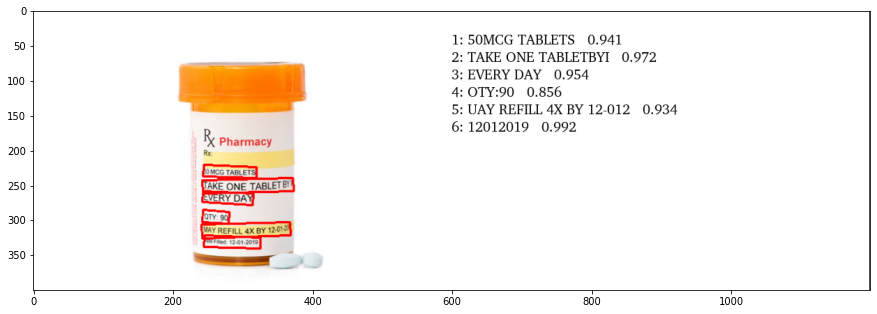

In [12]:
plt.figure(figsize=(15,15))
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)
plt.imshow(annotated)